### Importaciones y lecturas

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfAll = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/dfAll.csv')

df_clientes_malos = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUS/df_clientes_malos.csv')
df_clientes_regulares = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUS/df_clientes_regulares.csv')
df_clientes_vip = pd.read_csv('/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Tablas/df_STATUS/df_clientes_vip.csv')

### Limpieza datos y variables dummy

In [3]:
# Se eliminan duplicados,  STATUS (ver 1_data_cleaning.ipynb ) balance del mes 

dfAll_m = dfAll.drop_duplicates( subset= ['ID'] , keep='first')
dfAll_m = dfAll_m.drop(['Unnamed: 0','STATUS', 'MONTHS_BALANCE'], axis = 1)
dfAll_m.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,NaN,2.0
16,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,32.89,12.44,1,1,0,0,NaN,2.0
31,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,58.83,3.11,1,0,0,0,Security staff,2.0


In [4]:
dfAll_m.columns, dfAll_m.shape

(Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
        'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
        'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'YEARS_BIRTH',
        'YEARS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
        'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
       dtype='object'),
 (36457, 18))

In [5]:
dfAll_m['YEARS_EMPLOYED'].describe(), dfAll_m['YEARS_BIRTH'].describe()

(count    36457.000000
 mean      -162.364823
 std        377.128577
 min      -1000.670000
 25%          1.120000
 50%          4.250000
 75%          8.640000
 max         43.050000
 Name: YEARS_EMPLOYED, dtype: float64,
 count    36457.000000
 mean        43.767611
 std         11.508341
 min         20.520000
 25%         34.140000
 50%         42.640000
 75%         53.250000
 max         68.910000
 Name: YEARS_BIRTH, dtype: float64)

In [6]:
df_clientes_malos.shape , df_clientes_regulares.shape , df_clientes_vip.shape

((96, 18), (12258, 18), (8803, 18))

In [7]:
df_clientes_malos.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5018501,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,5038807,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0


In [8]:
# Se elimina ID en la correlacion para evitar valores incongruentes 

# dfAll_m = dfAll_m.dropna()

df_clientes_malos = df_clientes_malos.drop(['ID'], axis = 1)
df_clientes_regulares = df_clientes_regulares.drop(['ID'], axis = 1)
df_clientes_vip = df_clientes_vip.drop(['ID'], axis = 1)

# Se eliminan valores vacíos en 

df_clientes_malos = df_clientes_malos.dropna()
df_clientes_regulares = df_clientes_regulares.dropna()
df_clientes_vip = df_clientes_vip.dropna()

df_clientes_malos_str = df_clientes_malos
df_clientes_regulares_str = df_clientes_regulares
df_clientes_vip_str = df_clientes_vip

In [9]:
df_clientes_malos.head(3)

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,F,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,51.92,2.75,1,1,1,0,Cooking staff,2.0
1,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,51.80,6.77,1,0,0,0,Sales staff,1.0
2,M,Y,Y,0,202500.0,Commercial associate,Higher education,Married,House / apartment,34.68,14.72,1,0,0,1,Laborers,2.0


In [10]:
# Se prueban variables dummy

df_clientes_malos = pd.get_dummies(df_clientes_malos)
df_clientes_regulares = pd.get_dummies(df_clientes_regulares)
df_clientes_vip = pd.get_dummies(df_clientes_vip)

### Correlación

In [11]:
# Se hace la primer correlación
# Se eliminan automáticamente valores con string

s_clientes_malos = df_clientes_malos.corr()
s_clientes_regulares = df_clientes_regulares.corr()
s_clientes_vip = df_clientes_vip.corr()

In [12]:
# # Se elimina Flag Mobil por inconsistencia

df_clientes_malos_1 = df_clientes_malos.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_regulares_1 = df_clientes_regulares.drop(['FLAG_MOBIL'], axis = 1)
df_clientes_vip_1 = df_clientes_vip.drop(['FLAG_MOBIL'], axis = 1)

s_clientes_malos_1 = df_clientes_malos_1.corr()
s_clientes_regulares_1 = df_clientes_regulares_1.corr()
s_clientes_vip_1 = df_clientes_vip_1.corr()

In [13]:
s_clientes_malos_1

,CNT_CHILDREN,AMT_INCOME_TOTAL,YEARS_BIRTH,YEARS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,...,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
CNT_CHILDREN,1.000000,0.100234,-0.297224,-0.130159,0.184868,0.368375,0.044766,0.845809,0.189600,-0.189600,...,-0.079087,-0.097639,-0.072006,0.140716,-0.081175,-0.139820,0.140246,-0.068619,-0.102882,0.098892
AMT_INCOME_TOTAL,0.100234,1.000000,-0.064819,-0.166888,-0.311802,-0.104082,0.093540,-0.062004,-0.141701,0.141701,...,0.113757,-0.133546,-0.082258,-0.066850,0.308801,-0.135525,-0.014099,-0.105572,0.027702,-0.125102
YEARS_BIRTH,-0.297224,-0.064819,1.000000,0.201707,-0.060275,-0.078016,-0.269351,-0.208046,-0.024457,0.024457,...,0.058510,-0.230371,-0.092529,-0.003173,0.018185,0.092077,-0.112050,0.057316,0.254284,-0.202020
YEARS_EMPLOYED,-0.130159,-0.166888,0.201707,1.000000,-0.077283,-0.158536,-0.112366,-0.005913,0.314137,-0.314137,...,0.067909,-0.113763,-0.004262,0.007193,-0.052802,0.488760,-0.143541,0.055112,-0.190364,-0.030076
FLAG_WORK_PHONE,0.184868,-0.311802,-0.060275,-0.077283,1.000000,0.463980,-0.190076,0.165239,-0.035603,0.035603,...,-0.096170,-0.091451,-0.003386,-0.091451,0.017726,-0.001559,0.022829,0.189749,-0.162459,-0.064270
FLAG_PHONE,0.368375,-0.104082,-0.078016,-0.158536,0.463980,1.000000,0.112354,0.328783,0.075974,-0.075974,...,-0.060338,-0.112117,-0.090282,0.220229,-0.128578,0.077409,-0.033144,0.154773,-0.199172,-0.078794
FLAG_EMAIL,0.044766,0.093540,-0.269351,-0.112366,-0.190076,0.112354,1.000000,0.043848,-0.035624,0.035624,...,-0.106667,0.481125,-0.056110,-0.051320,-0.127657,0.117125,-0.099119,-0.036067,-0.091168,0.338126
CNT_FAM_MEMBERS,0.845809,-0.062004,-0.208046,-0.005913,0.165239,0.328783,0.043848,1.000000,0.163548,-0.163548,...,-0.002811,-0.023801,-0.004206,0.155788,-0.140427,-0.098376,0.003582,-0.016727,-0.095454,0.109485
CODE_GENDER_F,0.189600,-0.141701,-0.024457,0.314137,-0.035603,0.075974,-0.035624,0.163548,1.000000,-1.000000,...,0.128644,0.140927,-0.299092,0.140927,-0.078379,0.201808,0.097734,0.099041,-0.217649,0.099041
CODE_GENDER_M,-0.189600,0.141701,0.024457,-0.314137,0.035603,-0.075974,0.035624,-0.163548,-1.000000,1.000000,...,-0.128644,-0.140927,0.299092,-0.140927,0.078379,-0.201808,-0.097734,-0.099041,0.217649,-0.099041


### Gráficas

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Clientes_malos_dummy.png'

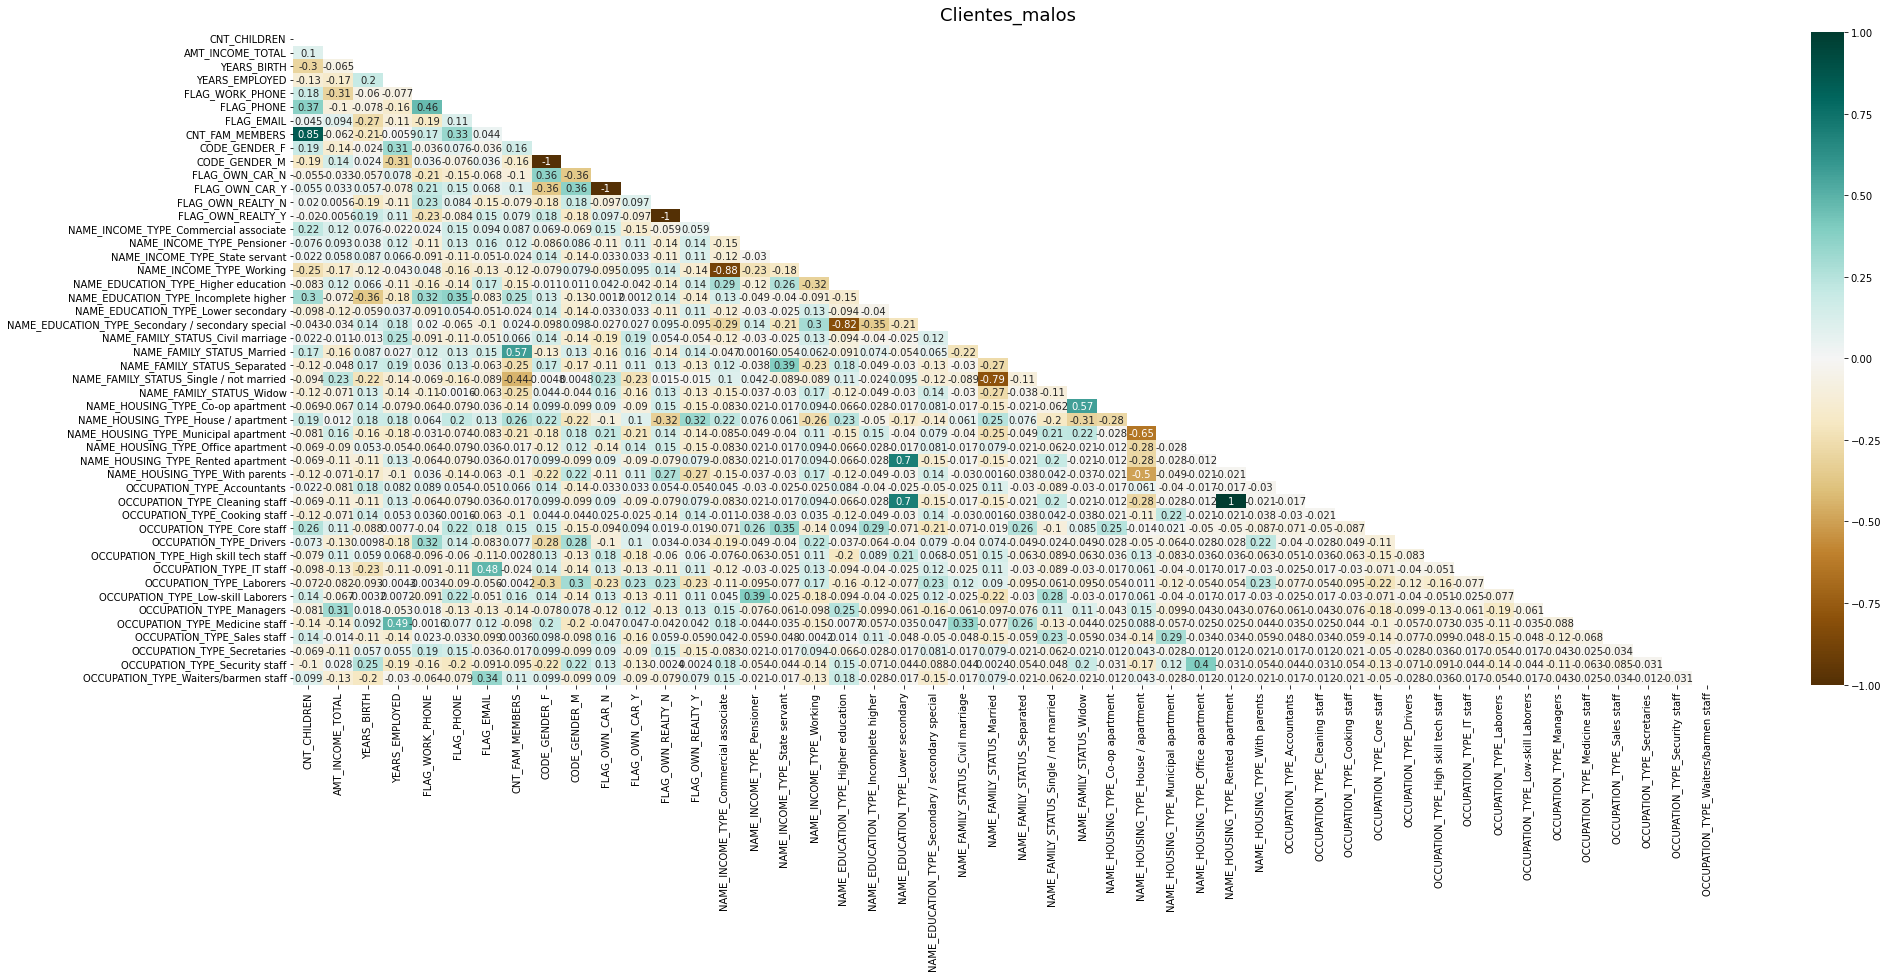

In [14]:
plt.figure(figsize=(32, 12))
mask = np.triu(np.ones_like(s_clientes_malos_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_malos_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_malos', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_malos_dummy.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_malos_dummy.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Clientes_malos_dummy.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Clientes_VIP_dummy.png'

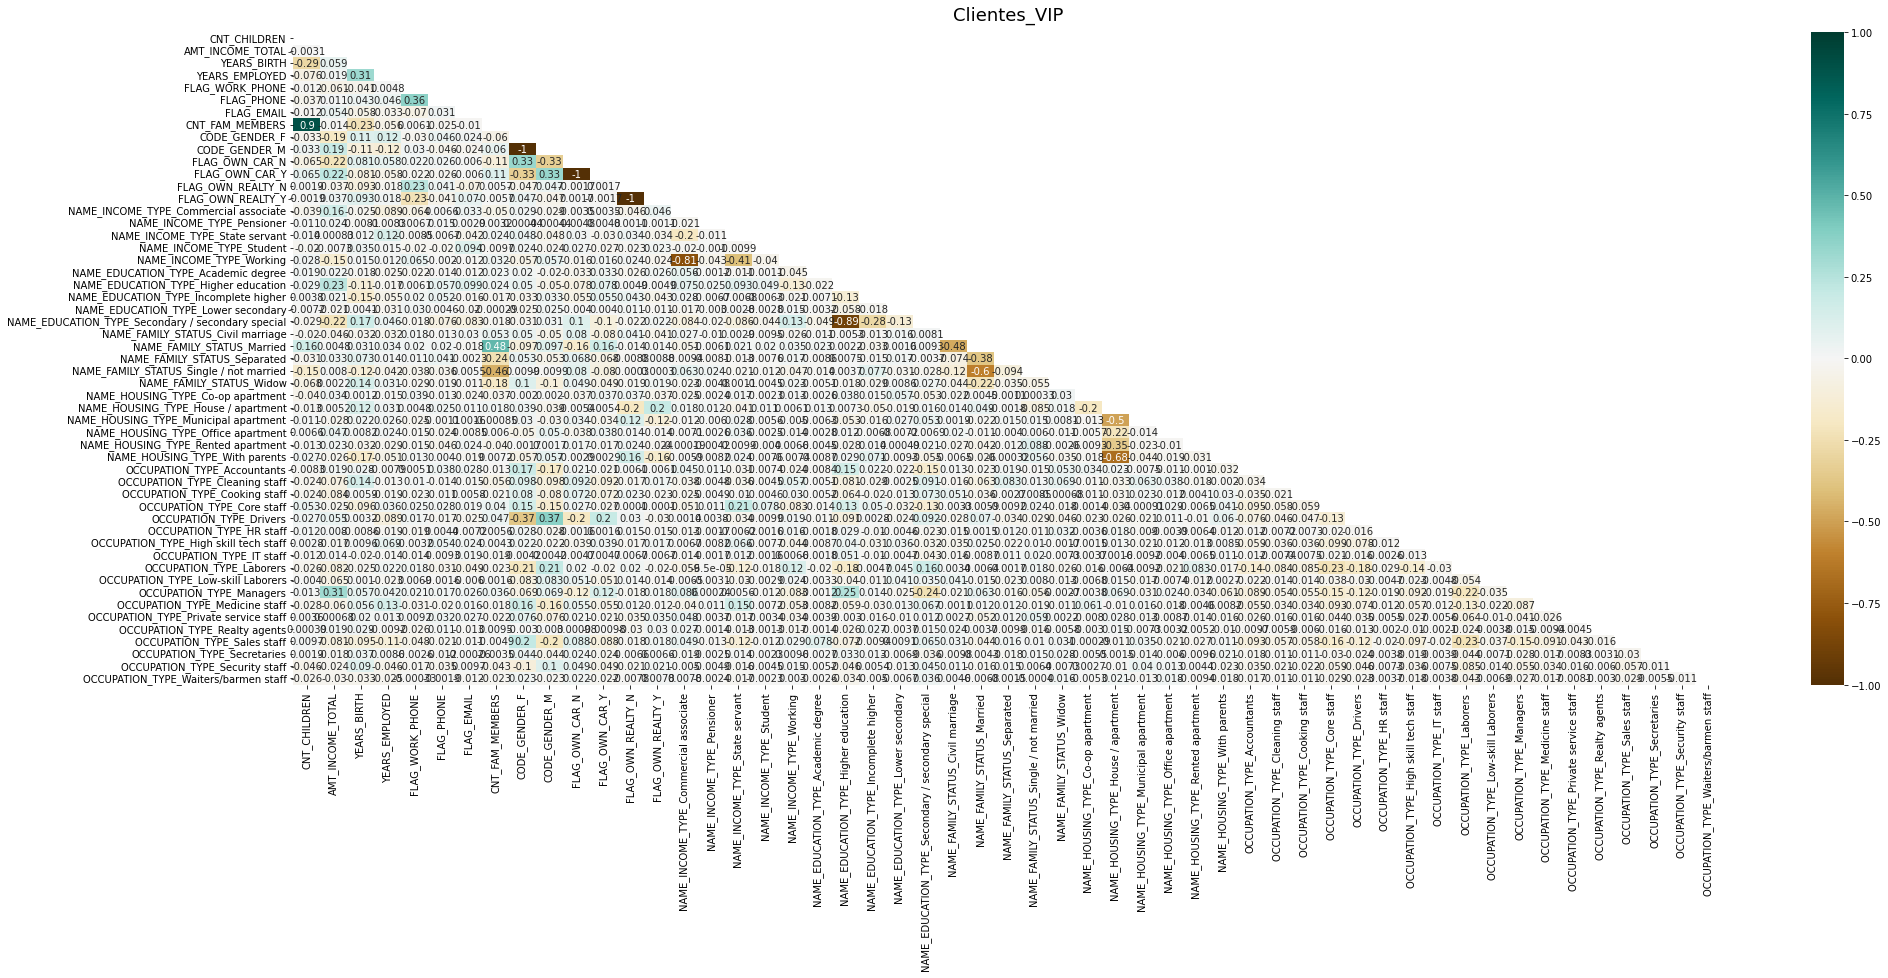

In [15]:
plt.figure(figsize= (32, 12))
mask = np.triu(np.ones_like(s_clientes_vip_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_vip_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_VIP', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_VIP_dummy.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_VIP_dummy.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Clientes_VIP_dummy.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Clientes_regulares_dummy.png'

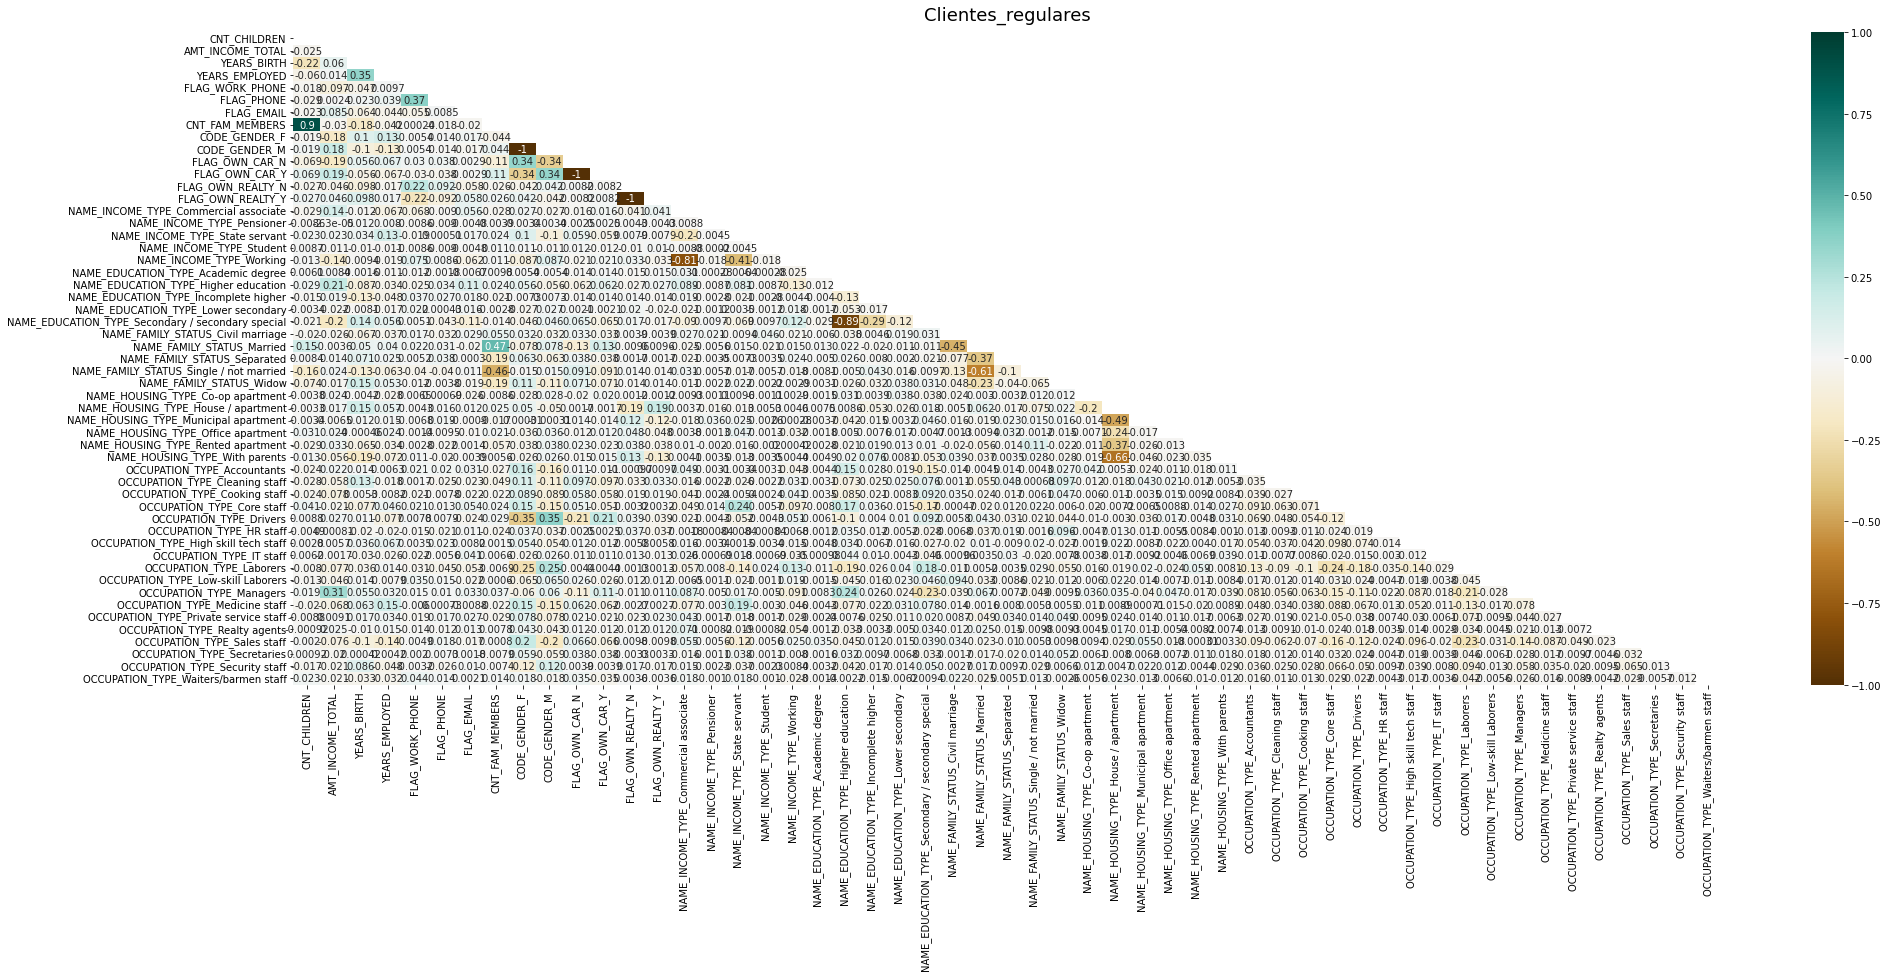

In [16]:
plt.figure(figsize=(32, 12))
mask = np.triu(np.ones_like(s_clientes_regulares_1, dtype=bool))
heatmap = sns.heatmap(s_clientes_regulares_1, mask= mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Clientes_regulares', fontdict={'fontsize':18}, pad=12);

plt.savefig('Clientes_regulares_dummy.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Clientes_regulares_dummy.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Clientes_regulares_dummy.png'
shutil.move(pos1,pos2)


'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Correlación_AMT_INCOME_TOTAL_VIP_dummy.png'

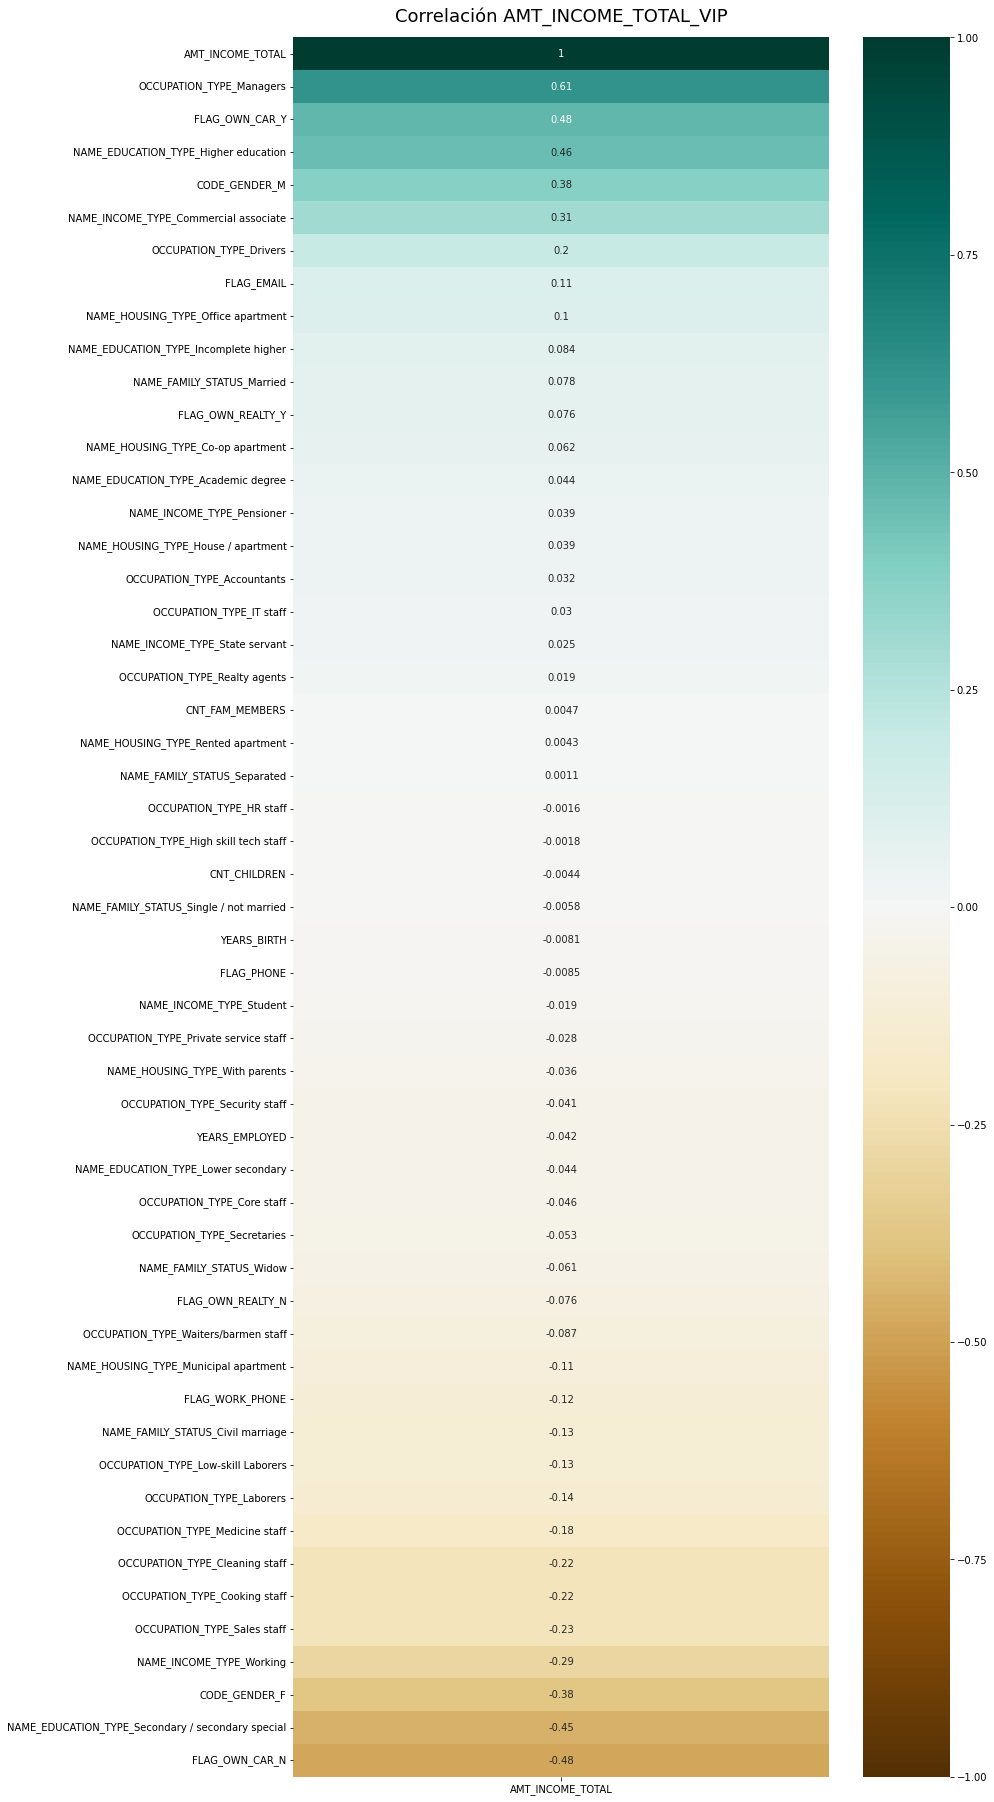

In [17]:
# Correlación por ingresos sin strings

plt.figure(figsize=(12,32))
heatmap = sns.heatmap(s_clientes_vip_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_VIP', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlación_AMT_INCOME_TOTAL_VIP_dummy.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_VIP_dummy.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Correlación_AMT_INCOME_TOTAL_VIP_dummy.png'
shutil.move(pos1,pos2)

'/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Correlación_AMT_INCOME_TOTAL_malos_dummy.png'

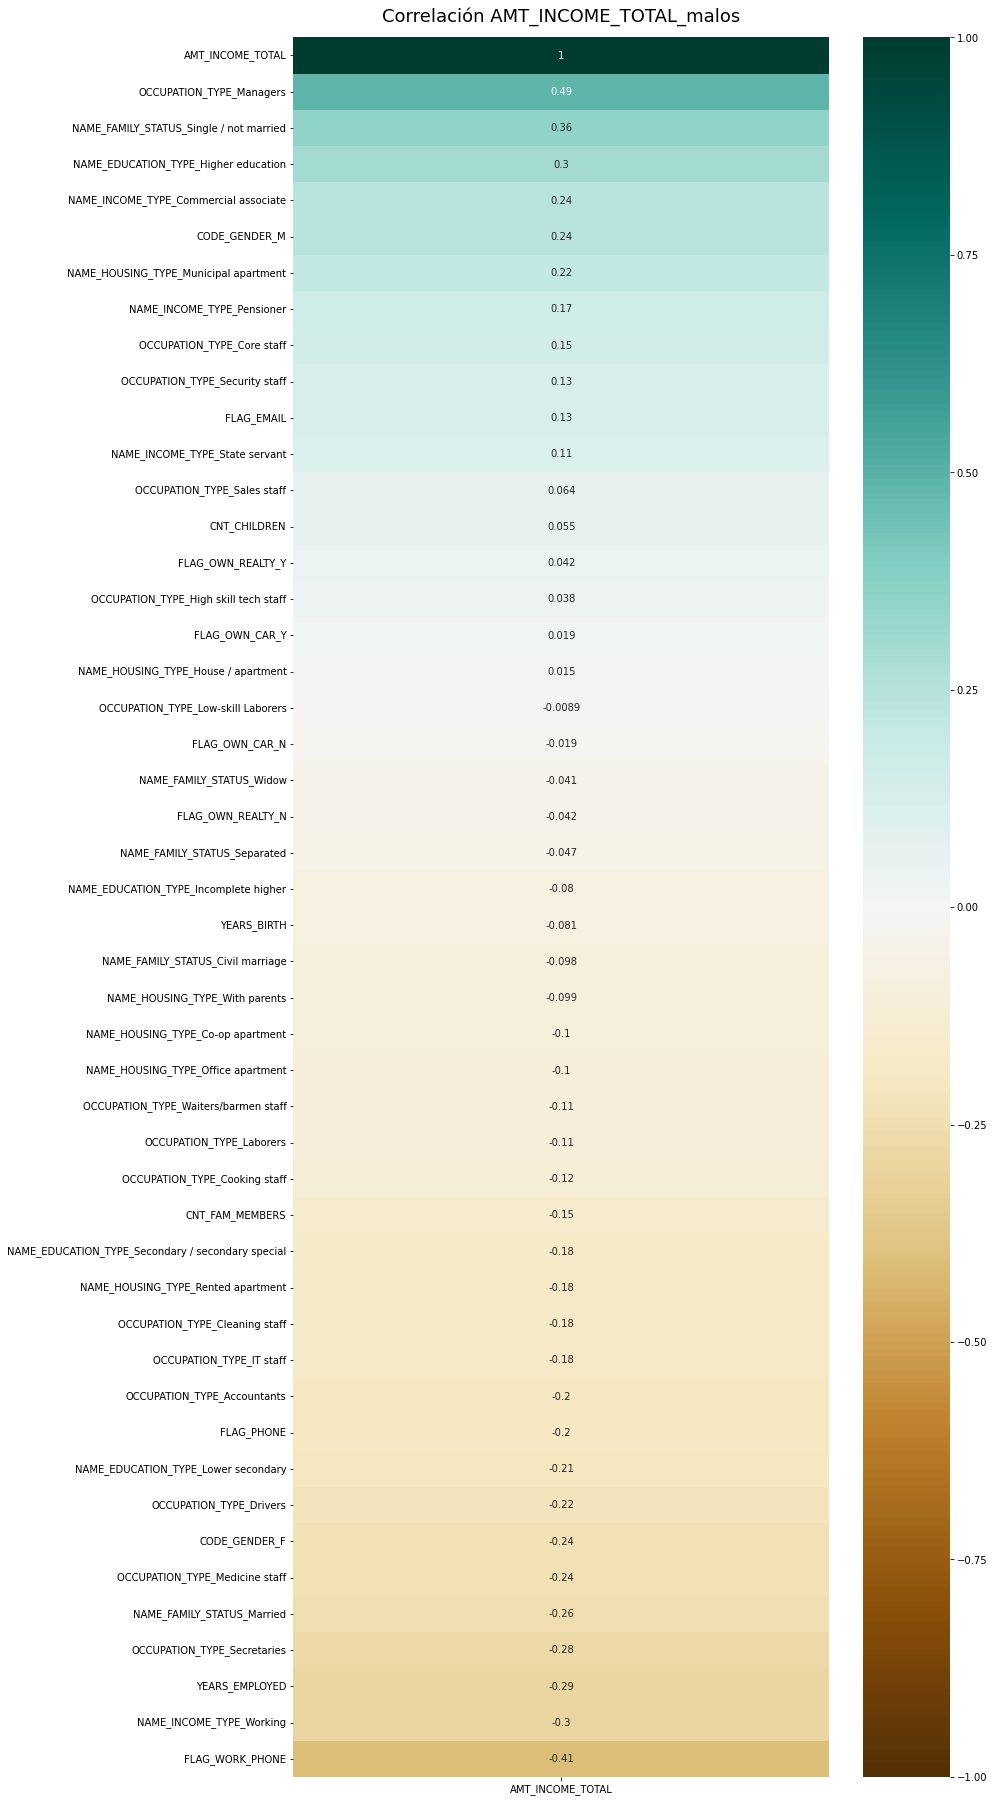

In [18]:
plt.figure(figsize=(12,32))
heatmap = sns.heatmap(s_clientes_malos_1.corr()[['AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlación AMT_INCOME_TOTAL_malos', fontdict={'fontsize':18}, pad=16);

plt.savefig('Correlación_AMT_INCOME_TOTAL_malos_dummy.png', dpi=300, bbox_inches='tight')
pos1= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/KPI_exercise/Correlación_AMT_INCOME_TOTAL_malos_dummy.png'
pos2= '/Users/yairmartinez/Documents/GitHub/data_analysis_exercises/DB/Graficas/Dummy/Correlación_AMT_INCOME_TOTAL_malos_dummy.png'
shutil.move(pos1,pos2)